This notebook file shows how data preperation was done across all team members. This includes data importation, with adding lables to images, checking class imbalence, and decreasing data to only the top 20 classes in the data set.

#### 1. Load in data

In [ ]:
# load libraries
import os
import shutil
import tarfile
import urllib.request
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import tensorflow as tf

#### 2. Import Data from [Website ](https://www.tensorflow.org/datasets/catalog/stanford_dogs)and Corresponding [Github ](https://github.com/tensorflow/datasets/blob/master/tensorflow_datasets/datasets/stanford_dogs/stanford_dogs_dataset_builder.py)

In [ ]:
# import libraries for downloading the data

import os
import glob
import urllib.request
import tarfile

# to make google colab compatible
DATA_DIR = "/content/data" # where all downloaded data will go

# where folder containing images subfolders will go
IMAGES_ROOT = os.path.join(DATA_DIR, "Images")

# where folder of annotations will go
ANNOT_ROOT  = os.path.join(DATA_DIR, "Annotation")

# create the directory if it doesn't exist yet
os.makedirs(DATA_DIR, exist_ok=True)

# download the images and annotate tars
IMAGES_URL = "http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar"
ANNOT_URL  = "http://vision.stanford.edu/aditya86/ImageNetDogs/annotation.tar"

# where to save image tar file into images folder
IMAGE_TAR_PATH = os.path.join(DATA_DIR, "images.tar")

# where to save annotation file into annotation folder
ANNOT_TAR_PATH = os.path.join(DATA_DIR, "annotation.tar")

# function to download the file
def download(url, path):
    if os.path.exists(path):
        print(f"{path} already exists, skipping download.")
        return
    print(f"Downloading {url} ...")
    urllib.request.urlretrieve(url, path)
    print("Done!\n")
# download images if not already downloaded
download(IMAGES_URL, IMAGE_TAR_PATH)
# download annotations if not already downloaded
download(ANNOT_URL, ANNOT_TAR_PATH)

# function to extarct the tar files that were downloaded
def extract(tar_path, extract_to):
    print(f"Extracting {tar_path} ...")
    with tarfile.open(tar_path) as tar:
        tar.extractall(extract_to)
    print("Done!\n")
# extracts the data if it wasn't extracted already
extract(IMAGE_TAR_PATH, DATA_DIR)
extract(ANNOT_TAR_PATH, DATA_DIR)

# to sort the breed folders
if not os.path.exists(IMAGES_ROOT):
    raise FileNotFoundError(f"{IMAGES_ROOT} not found. Check extraction paths.")

# sort the breeds alphabetically
breeds = sorted(os.listdir(IMAGES_ROOT))

# prints number of breeds
print("Number of breeds:", len(breeds))
# prints the first 10 breed names
print("First 10 breeds:", breeds[:10], "\n")

# Mapping from breed to index based on sorted order
class_to_idx = {breed: idx for idx, breed in enumerate(breeds)}

# to pair images with annotations folders properly

# lists to storey images and labels
images = []
labels = []

for breed in breeds: # to loop through each breed folder
    breed_img_dir   = os.path.join(IMAGES_ROOT, breed) # path for each image folder
    breed_annot_dir = os.path.join(ANNOT_ROOT, breed) # path for eah annotation folder

     # to list all the images for breed at the moment
    image_files = glob.glob(os.path.join(breed_img_dir, "*.jpg"))

    # for each file, extract the filename
    for img_path in image_files:
        base = os.path.splitext(os.path.basename(img_path))[0]

        # to check that annotation folder exists (latest tar format)
        annot_folder = os.path.join(breed_annot_dir, base)
        if not os.path.exists(annot_folder):
            print("Missing annotation for:", img_path)
            continue # if not missing annotation proceeds with a warning
        # if annotation, append to images and labels properly
        images.append(img_path)
        labels.append(class_to_idx[breed])

print("Total usable images:", len(images))

# an example entry
if len(images) > 0:
    print("\nExample image path:", images[0])
    print("Label index:", labels[0])
    print("Breed:", breeds[labels[0]])
else:
    print("No images were successfully paired. Check extraction paths.")


Done!

Done!

Extracting /content/data/images.tar ...


/tmp/ipython-input-3578446810.py:47: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(extract_to)


Done!

Extracting /content/data/annotation.tar ...
Done!

Number of breeds: 120
First 10 breeds: ['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound'] 

Total usable images: 20580

Example image path: /content/data/Images/n02085620-Chihuahua/n02085620_712.jpg
Label index: 0
Breed: n02085620-Chihuahua


#### 3. Check to See Lable Output with Image

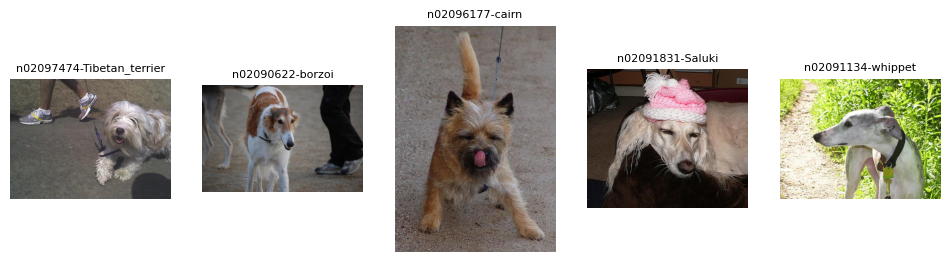

In [ ]:
# code to check output of labels
import matplotlib.pyplot as plt
# import numpy to
import numpy as np
import random
from PIL import Image

# sample 5 images randomly and print image and label
sample_indices = random.sample(range(len(images)), 5)

plt.figure(figsize=(12, 6))
for i, idx in enumerate(sample_indices):
    img = Image.open(images[idx])
    label = labels[idx]
    breed_name = breeds[label]

    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(breed_name, fontsize=8)
    plt.axis('off')
plt.show()


#### 4. Check Class Distribution for Class Imbalance

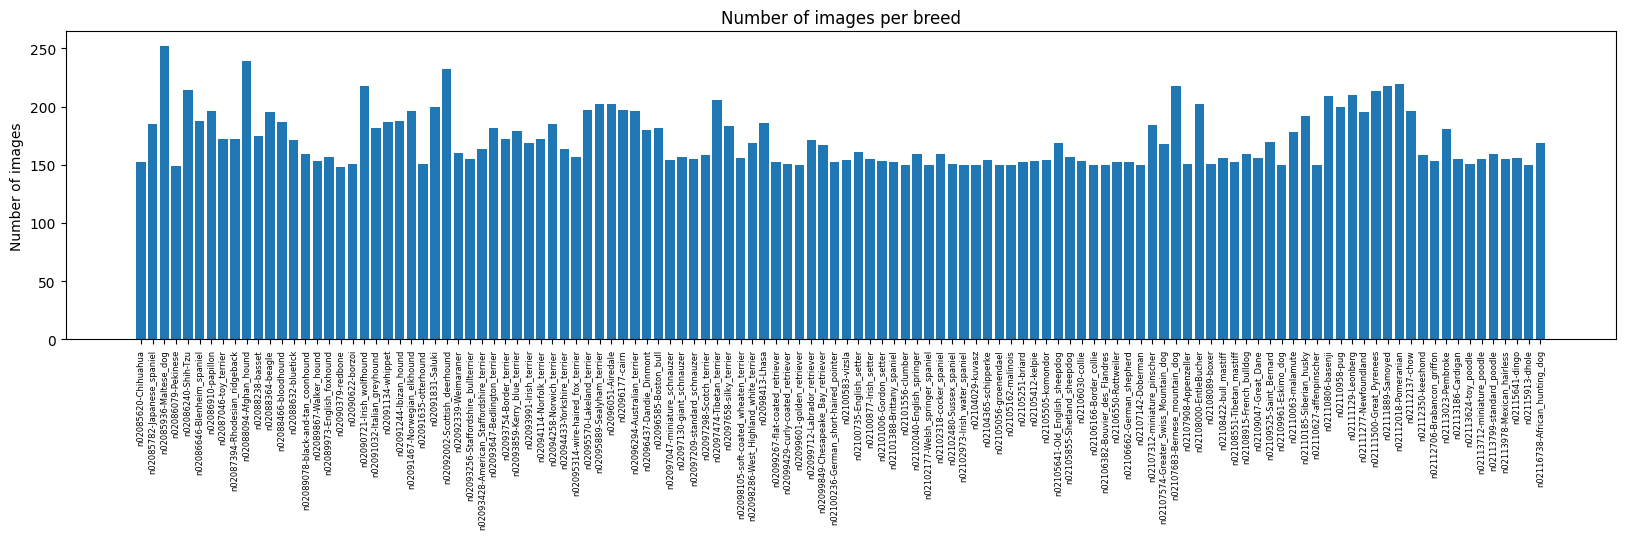

In [ ]:
# see distribution of current coutns per breed / class

# get counts for each breeds
counts = [labels.count(i) for i in range(len(breeds))]

# plotting
plt.figure(figsize=(20,4))
plt.bar(range(len(breeds)), counts)
plt.xticks(range(len(breeds)), breeds, rotation=90, fontsize=6)
plt.ylabel("Number of images")
plt.title("Number of images per breed")
plt.show()

No large class imbalance seen. All good to go.

#### 5. Check to if all 120 classes are correctly used.

In [ ]:
# to ensure there are 120 labels used
unique_labels = set(labels)
print("Number of unique labels:", len(unique_labels))
assert len(unique_labels) == len(breeds)
# assertion works and is good

Number of unique labels: 120


In [ ]:
# check a breed
  # do chiuahua since it was given in one of the ouput above
breed_to_check = "n02085620-Chihuahua"
breed_idx = class_to_idx[breed_to_check]

# get all images with this label
breed_images = [img for img, lbl in zip(images, labels) if lbl == breed_idx]

print(f"Number of images labeled {breed_to_check}: {len(breed_images)}")
print("First 5 image paths:", breed_images[:5])


Number of images labeled n02085620-Chihuahua: 152
First 5 image paths: ['/content/data/Images/n02085620-Chihuahua/n02085620_712.jpg', '/content/data/Images/n02085620-Chihuahua/n02085620_4919.jpg', '/content/data/Images/n02085620-Chihuahua/n02085620_10131.jpg', '/content/data/Images/n02085620-Chihuahua/n02085620_4602.jpg', '/content/data/Images/n02085620-Chihuahua/n02085620_4572.jpg']


#### 6. Decrease to the top 20 classes to allow easier learning for the model.

In [ ]:
# Decrease to 20 most frequently occurring breeds

breed_counts = []

for breed in os.listdir(IMAGES_ROOT):
    breed_path = os.path.join(IMAGES_ROOT, breed)

    # count jpg files
    n_images = sum(
        f.lower().endswith(".jpg")
        for f in os.listdir(breed_path)
    )

    breed_counts.append((breed, n_images))

# sort by freq (desc)
breed_counts.sort(key=lambda x: x[1], reverse=True)

# select top 20
selected_breeds = [breed for breed, count in breed_counts[:20]]

print("Selected breeds (top 20):")
print(selected_breeds)

# filter
breeds = selected_breeds

Selected breeds (top 20):
['n02085936-Maltese_dog', 'n02088094-Afghan_hound', 'n02092002-Scottish_deerhound', 'n02112018-Pomeranian', 'n02090721-Irish_wolfhound', 'n02107683-Bernese_mountain_dog', 'n02111889-Samoyed', 'n02086240-Shih-Tzu', 'n02111500-Great_Pyrenees', 'n02111129-Leonberg', 'n02110806-basenji', 'n02097474-Tibetan_terrier', 'n02095889-Sealyham_terrier', 'n02108000-EntleBucher', 'n02096051-Airedale', 'n02091831-Saluki', 'n02110958-pug', 'n02096177-cairn', 'n02095570-Lakeland_terrier', 'n02086910-papillon']


#### 7. Conduct Data Splits

In [ ]:
# import progress bar
from tqdm import tqdm
import shutil
from sklearn.model_selection import train_test_split


OUTPUT_DIR = os.path.join(DATA_DIR, "data_splits")
os.makedirs(OUTPUT_DIR, exist_ok=True)

train_dir = os.path.join(OUTPUT_DIR, "train")
val_dir = os.path.join(OUTPUT_DIR, "val")
test_dir = os.path.join(OUTPUT_DIR, "test")

for d in [train_dir, val_dir, test_dir]:
    os.makedirs(d, exist_ok=True)

# # need to sort breeds
# breeds = sorted(os.listdir(IMAGES_ROOT))


for breed in tqdm(breeds, desc="Splitting breeds"):
    breed_path = os.path.join(IMAGES_ROOT, breed)

    # all image paths for this breed
    image_files = [
        os.path.join(breed_path, f)
        for f in os.listdir(breed_path)
        if f.lower().endswith(".jpg")
    ]

    # create splits now

    # 70% train, 15% val, 15% test for splits
    train_imgs, temp_imgs = train_test_split(
        image_files, test_size=0.30, random_state=42
    )
    val_imgs, test_imgs = train_test_split(
        temp_imgs, test_size=0.50, random_state=42
    )

    # output breed folders
    for split_name, split_imgs in zip(["train", "val", "test"],
                                      [train_imgs, val_imgs, test_imgs]):

        split_breed_folder = os.path.join(OUTPUT_DIR, split_name, breed)
        os.makedirs(split_breed_folder, exist_ok=True)

        # copy images to proper split folder
        for img_path in split_imgs:
            shutil.copy(img_path, split_breed_folder)

print("Dataset split complete!")
print(f"Train directory: {train_dir}")
print(f"Val directory:   {val_dir}")
print(f"Test directory:  {test_dir}")

Splitting breeds: 100%|██████████| 20/20 [00:00<00:00, 30.51it/s]

Dataset split complete!
Train directory: /content/data/data_splits/train
Val directory:   /content/data/data_splits/val
Test directory:  /content/data/data_splits/test


In [ ]:
# sanity check for decrease to 20 breeds
for split in ["train", "val", "test"]:
    breeds_in_split = sorted(os.listdir(os.path.join(OUTPUT_DIR, split)))
    print(split, len(breeds_in_split), "breeds")
    print(breeds_in_split)

train 20 breeds
['n02085936-Maltese_dog', 'n02086240-Shih-Tzu', 'n02086910-papillon', 'n02088094-Afghan_hound', 'n02090721-Irish_wolfhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02095570-Lakeland_terrier', 'n02095889-Sealyham_terrier', 'n02096051-Airedale', 'n02096177-cairn', 'n02097474-Tibetan_terrier', 'n02107683-Bernese_mountain_dog', 'n02108000-EntleBucher', 'n02110806-basenji', 'n02110958-pug', 'n02111129-Leonberg', 'n02111500-Great_Pyrenees', 'n02111889-Samoyed', 'n02112018-Pomeranian']
val 20 breeds
['n02085936-Maltese_dog', 'n02086240-Shih-Tzu', 'n02086910-papillon', 'n02088094-Afghan_hound', 'n02090721-Irish_wolfhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02095570-Lakeland_terrier', 'n02095889-Sealyham_terrier', 'n02096051-Airedale', 'n02096177-cairn', 'n02097474-Tibetan_terrier', 'n02107683-Bernese_mountain_dog', 'n02108000-EntleBucher', 'n02110806-basenji', 'n02110958-pug', 'n02111129-Leonberg', 'n02111500-Great_Pyrenees', 'n02111889-Samoye

In [ ]:
# to double check the counts per image split
for split in ["train", "val", "test"]:
    total = sum(len(files) for _, _, files in os.walk(os.path.join(OUTPUT_DIR, split)))
    print(split, total)


train 2963
val 637
test 644


In [ ]:
# check that the total number of breeds is preseved
print(len(os.listdir(train_dir)), "breeds in train")
print(len(os.listdir(val_dir)),   "breeds in val")
print(len(os.listdir(test_dir)),  "breeds in test")

# all 20 breeds in each split data

20 breeds in train
20 breeds in val
20 breeds in test


#### 7. Convert to TF Dataset for efficiency

In [ ]:
# convert to pytorch dataset

import tensorflow as tf

IMG_SIZE = 224
BATCH_SIZE = 32

#split directories
OUTPUT_DIR = os.path.join(DATA_DIR, "data_splits")
train_dir = os.path.join(OUTPUT_DIR, "train")
val_dir   = os.path.join(OUTPUT_DIR, "val")
test_dir  = os.path.join(OUTPUT_DIR, "test")

# training dataset first
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    label_mode="int",
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
)

# validation dataset now
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    label_mode="int",
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=False,
)

# test dataset last
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    label_mode="int",
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=False,
)


Found 2963 files belonging to 20 classes.
Found 637 files belonging to 20 classes.
Found 644 files belonging to 20 classes.
